### 这是一份用户消费的分析报告
### 数据来源于国外
****

In [3]:
import pandas as pd
import numpy as np

In [4]:
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('CDNOW_master.txt',names=columns,sep='\s+') #s+表示空格分割

## 后面都用这四个字段分析
* user_id:用户id
 * order_dt:购买日期
 * order_products:购买产品数
 * roder_amount:购买金额

In [15]:
# 先看5个数据观察下，日趋识别是证书形式
df.head(2)   

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [18]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000



* 大部分购买数量在2.4个左右，有极值干扰

* 消费金额在36左右


### 日期转化

In [27]:
df['order_dt']=pd.to_datetime(df.order_dt,format="%Y%m%d") 
#df['month']=df.order_dt.values #转为列表,下面操作就是按照月份分组
df['month']=df.order_dt.values.astype('datetime64[M]') #新增数据，时间维度转换按照月份,Y就是年份

In [28]:
df.head(10)

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


# 1、进行用户消费趋势的分析(按月)
        * 每月的消费总金额
        * 每月的消费次数
        * 每月的产品购买量
        * 每月的消费人数

In [30]:
grouped_month = df.groupby('month') #按照月份分组
order_month_amount = grouped_month.order_amount.sum() #计算每月总金额
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

        
1、Jan. January 一月；

2、Feb. February 二月；

3、Mar. March 三月；

4、Apr. April 四月；

5、May无缩写 五月；

6、Jun. June 六月；

7、Jul. July 七月；

8、Aug. August 八月；

9、Sep. September九月；

10、Oct. October 十月；

11、Nov. November 十一月；

12、Dec. December 十二月。

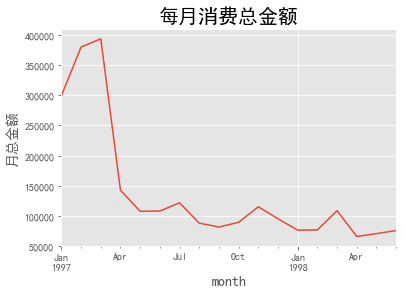

In [33]:
# 加载数据可视化
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot') #绘图风格
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置图标标题
plt.title("每月消费总金额",fontsize = 20)
#设置坐标轴标签
plt.xlabel("月份",fontsize = 14)
plt.ylabel("月总金额",fontsize = 14)
order_month_amount.plot()

### 由上图可知，消费金额前三个月达到高峰，后面消费较为稳定

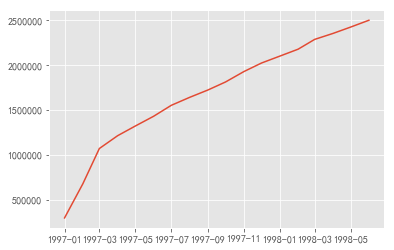

In [34]:
plt.plot(order_month_amount.cumsum()) #消费总趋势,累加求和，斜率表示增长率

In [36]:
# order_month_amount.cumsum().plot()

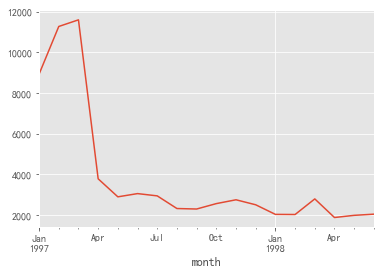

In [44]:
# 月里面用户数量统计
grouped_month.user_id.count().plot()  #count其他字段也行

前三月每月订单量在一万左右，后面每月维持在2500左右

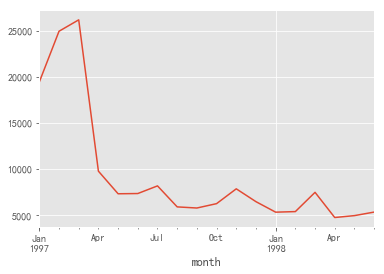

In [45]:
products=grouped_month.order_products.sum().plot() #月总产品数

### 前三个月消费订单在15000左右，后面稳定在3500

### 统计消费人数
对月消费的用户遍历去重。默认保留第一个

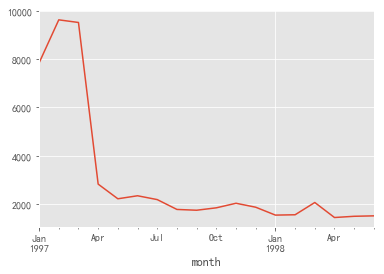

In [46]:
df.groupby('month').user_id.apply(lambda x:len(x.drop_duplicates())).plot() #聚合然后去重

### 或者使用下面方法

In [56]:
df.groupby(['month','user_id']).count().reset_index() .groupby('month').count()#分组相当于已经去重了

,user_id,order_dt,order_products,order_amount
month,,,,
1997-01-01,7846,7846,7846,7846
1997-02-01,9633,9633,9633,9633
1997-03-01,9524,9524,9524,9524
1997-04-01,2822,2822,2822,2822
1997-05-01,2214,2214,2214,2214
1997-06-01,2339,2339,2339,2339
1997-07-01,2180,2180,2180,2180
1997-08-01,1772,1772,1772,1772
1997-09-01,1739,1739,1739,1739


In [17]:
df.head(3)

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01


### 方法2,更加简单的数据透视表
pd.pivot_table()
主要有3个参数，index, columns,value, 以及aggfunc

index相当于行标签
columns相当于列标签
value相当于用来计算值，配合aggfunc来计算count/mean/average
注意value不能使用index 和columns已经使用过的值，这点和excel不同。

In [58]:
df.pivot_table(index = 'month',
               values = ['order_products','order_amount','user_id'], #想要计算的值
               aggfunc={'order_products':'sum',
                          'order_amount':'sum',
                          'user_id':'count'}).head() #每月订单数，未去重

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


## 2、用户个体消费分析
    - 用户消费金额，消费次数描述统计
    - 用户消费金额和消费的散点图
    - 用户消费次数的分布
    - 用户累计消费金额占比（百分之多少用户占了百分之多少金额）

In [59]:
grouped_user = df.groupby('user_id')  #用户分组

In [60]:
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


 * 用户购买了7张CD，但是中位数是3，说明小部分用户购买了大量CD
 * 用户平均消费100元，中位数43，判断同上
 * max的值的很夸张 符合二八定律

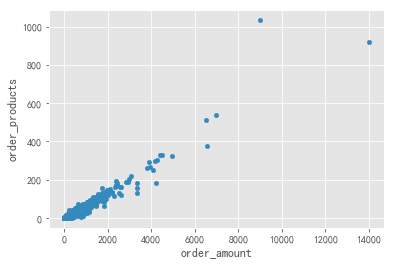

In [21]:
# plot.scatter 散点图
grouped_user.sum().plot.scatter(x='order_amount',y='order_products')

### 增加查询条件，过滤异常值。
### query类似SQL的where

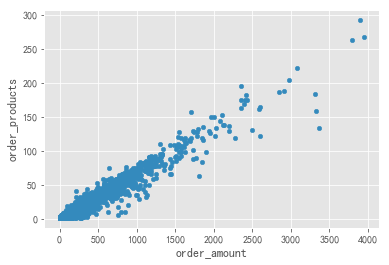

In [62]:
grouped_user.sum().query('order_amount < 4000').plot.scatter(x='order_amount',y='order_products')

## 直方图

In [65]:
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


95%数据在平均值得正负5个标准差内,7+(16*5)+7

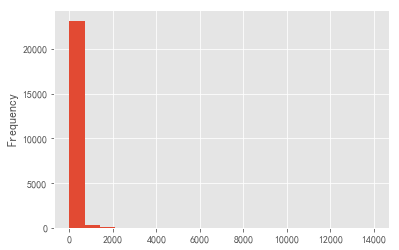

In [63]:
# 分为20层
grouped_user.sum().order_amount.plot.hist(bins = 20) #分层函数hist直方图

直方图可以看出集中趋势

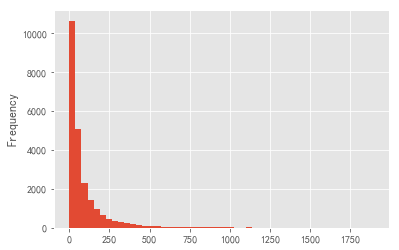

In [24]:
# 分为50层
grouped_user.sum().query('order_products < 100').order_amount.plot.hist(bins = 50)

```
大部分用户消费很少
切比雪夫定理过滤异常值，计算95%的数据分布情况
```

In [68]:
grouped_user.sum().sort_values('order_amount').cumsum() #累加求和,0可能是优惠行为

,order_products,order_amount
user_id,,
10175,1.0,0.00
4559,2.0,0.00
1948,3.0,0.00
925,4.0,0.00
10798,5.0,0.00
19314,6.0,0.00
21690,7.0,0.00
10664,8.0,0.00
4384,9.0,0.00


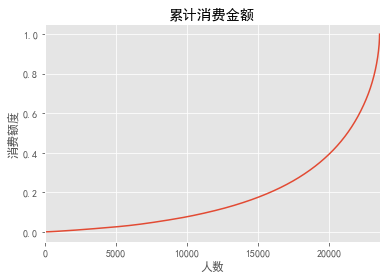

In [73]:
user_cumsum = grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum() / x.sum())  #累加值除以总数
#print(user_cumsum)
# 设置坐标轴的lable
plt.title('累计消费金额')
plt.xlabel('人数')
plt.ylabel('消费额度')
user_cumsum.reset_index().order_amount.plot()  #reset_index()去掉索引，方便作图

####  15%消费额是50%用户完成的，50%消费额是顶尖5000人消费完成的！

## 3.用户消费行为
    * 用户第一次消费
    * 用户最后次消费
    * 新老客消费比
        * 多少用户仅仅消费了一次
        * 每月新客占比
    * 用户分层
        * RFM
        * 新、老、活跃、回流、流失
    * 用户购买周期（按订单）
        * 用户消费周期描述
        * 用户消费周期分布
    * 用户生命周期
         * 用户生命周期描述
         * 用户生命周期分布

In [74]:
grouped_user.min()

,order_dt,order_products,order_amount,month
user_id,,,,
1,1997-01-01,1,11.77,1997-01-01
2,1997-01-12,1,12.00,1997-01-01
3,1997-01-02,1,16.99,1997-01-01
4,1997-01-01,1,14.96,1997-01-01
5,1997-01-01,1,13.97,1997-01-01
6,1997-01-01,1,20.99,1997-01-01
7,1997-01-01,2,28.74,1997-01-01
8,1997-01-01,1,2.99,1997-01-01
9,1997-01-01,2,23.54,1997-01-01


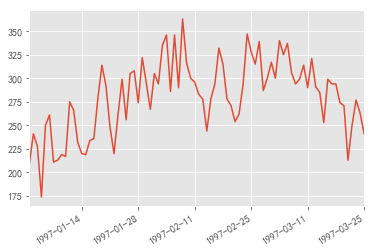

In [28]:
#value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值。
grouped_user.min().order_dt.value_counts().plot() #最小时间，第一次购买的时间，最遥远

用户第一次购买分布集中在前三个月

其中2月11到2月25有一次剧烈的波动

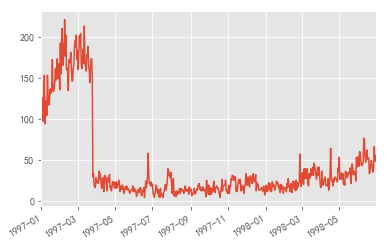

In [29]:
grouped_user.max().order_dt.value_counts().plot() #时间最大，最后一次消费

    用户最后次购买的分布比第一次分布广
    大部分最后次购买集中在前三个月，说明很多用户购买一次后就不购买了
    随着时间递增，最后一次购买数也在增长，消费呈现流失上升的情况

In [113]:
#新老客消费比
user_life = grouped_user.order_dt.agg(['min','max']) #第一次消费和最后次消费
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [114]:
(user_life['min'] == user_life['max']).value_counts() #第一次消费=最后次消费，即是消费了一次

True     12054
False    11516
dtype: int64

### 有一半用户就只消费了一次

In [32]:
df.sort_values

<bound method DataFrame.sort_values of        user_id   order_dt  order_products  order_amount      month
0            1 1997-01-01               1         11.77 1997-01-01
1            2 1997-01-12               1         12.00 1997-01-01
2            2 1997-01-12               5         77.00 1997-01-01
3            3 1997-01-02               2         20.76 1997-01-01
4            3 1997-03-30               2         20.76 1997-03-01
5            3 1997-04-02               2         19.54 1997-04-01
6            3 1997-11-15               5         57.45 1997-11-01
7            3 1997-11-25               4         20.96 1997-11-01
8            3 1998-05-28               1         16.99 1998-05-01
9            4 1997-01-01               2         29.33 1997-01-01
10           4 1997-01-18               2         29.73 1997-01-01
11           4 1997-08-02               1         14.96 1997-08-01
12           4 1997-12-12               2         26.48 1997-12-01
13           5 1997-01-

## 数据透视

In [76]:
rfm=df.pivot_table(index='user_id',
                  values=['order_products','order_amount','order_dt'],
                  aggfunc={'order_dt':'max',
                           'order_amount':'sum',
                           'order_products':'sum'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [77]:
# 日期转化
-(rfm.order_dt - rfm.order_dt.max()) #日期相减是天数，距离最后天日期

user_id
1       545 days
2       534 days
3        33 days
4       200 days
5       178 days
6       545 days
7       100 days
8        93 days
9        22 days
10      525 days
11      130 days
12      545 days
13      545 days
14      545 days
15      545 days
16      293 days
17      545 days
18      542 days
19      385 days
20      528 days
21      533 days
22      545 days
23      545 days
24      161 days
25       22 days
26      520 days
27      534 days
28      479 days
29       65 days
30      501 days
          ...   
23541   454 days
23542   462 days
23543   462 days
23544   157 days
23545   462 days
23546   462 days
23547   449 days
23548   462 days
23549   462 days
23550   462 days
23551   292 days
23552   453 days
23553   459 days
23554   149 days
23555    20 days
23556    23 days
23557   462 days
23558   125 days
23559   368 days
23560   462 days
23561    32 days
23562   462 days
23563   269 days
23564   212 days
23565   462 days
23566   462 days
23567   462 days
23568 

In [78]:
rfm['R']=-(rfm.order_dt - rfm.order_dt.max()) / np.timedelta64(1,'D')  #除法天数为了消除单位天
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)  #构造列
rfm.head()  #构造rfm字段，RFM分析（Recency，Frequency，Monetary）

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [79]:
rfm[['R','F','M']].head()

,R,F,M
user_id,,,
1,545.0,1,11.77
2,534.0,6,89.00
3,33.0,16,156.46
4,200.0,7,100.50
5,178.0,29,385.61


In [81]:
rfm[['R','F','M']].apply(lambda x : x - x.mean()).head()  #三个维度均分，与平均值比较，不便于理解
##下面把三个值化为111

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [85]:
def rfm_func(x):
    level = x.apply(lambda x : '1' if x >= 0 else '0') #字符串非数字
    label = level.R + level.F +level.M
    d = {                           #替代if/else
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
        }
    result = d[label]  #字典转化
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x : x-x.mean()).apply(rfm_func,axis = 1)

In [86]:
rfm.head(10)

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户
6,20.99,1997-01-01,1,545.0,一般发展客户
7,264.67,1998-03-22,18,100.0,重要保持客户
8,197.66,1998-03-29,18,93.0,重要保持客户
9,95.85,1998-06-08,6,22.0,一般挽留客户


In [87]:
rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,14074,14074,14074,14074
一般挽留客户,3300,3300,3300,3300
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,241,241,241,241
重要挽留客户,331,331,331,331


In [88]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,438291.81,29346,6951815.0
一般挽留客户,196971.23,13977,591108.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,33028.40,1263,114482.0
重要挽留客户,45785.01,2023,56636.0


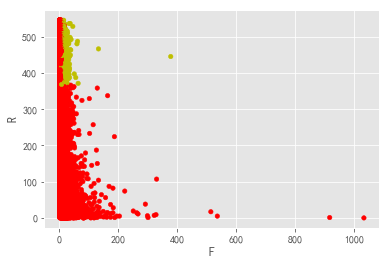

In [89]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'y'
rfm.loc[~(rfm.label == '重要价值客户'),'color'] = 'r'  #非重要价值用户
rfm.plot.scatter('F','R',c=rfm.color)

从RFM 分层可知，大部分用户为重要保持客户，但是这是由于极值的影响，所有RFM的划分应该以业务为准
   * 尽量用小部分的用户覆盖大部分的额度
   * 不要为了数据好看划分等级
## 为业务服务

In [91]:
# 可以做出8种图
#rfm.loc[rfm.label == '重要价值客户','color'] = 'y'
#……

### 用户生命周期,真实数据库查询更加简单

In [92]:
pivoted_counts =  df.pivot_table(index = 'user_id',
                                columns = 'month',
                                values = 'order_dt',
                                aggfunc = 'count').fillna(0)
pivoted_counts.head(3)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
df_purchase = pivoted_counts.applymap(lambda x : 1 if x > 0 else 0)
df_purchase.tail(2)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
# 默认填充的0处理
def active_status(data):
    status = []
    for i in range(18):   #1-18月份
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg': #未注册
                    status.append('unreg')
                else:
                    status.append('unactive')  #不活跃
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return') #回流
                elif status[i-1] == 'unreg': #没注册，新购
                    status.append('new')
                else:
                    status.append('active')
    return status

若本月没有消费
    * 之前未注册，现在依然为注册
    * 之前有消费，则为流失
    * 其他情况，未注册
本月消费
    * 第一次，新用户
    * 之前消费，上月不活跃，回流
    * 上个月为注册，新用户
    * 除此之外，活跃

In [99]:
purchase_stats =df_purchase.apply(active_status,axis = 1)
purchase_stats.head(2)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [101]:
purchase_stats_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x :pd.value_counts(x))
purchase_stats_ct

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


流失用户在增加，运营不力

In [49]:
purchase_stats_ct.fillna(0).T.head()

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0


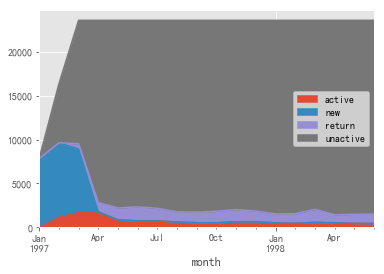

In [102]:
purchase_stats_ct.fillna(0).T.plot.area()  #每个月的不同状态

### 做业务指标

In [104]:
purchase_stats_ct.fillna(0).T.apply(lambda x:x / x.sum(),axis = 1) #逐行计算,四者的构成

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


        
    由上表可知，每月的用户消费状态变化
        * 活跃用户，持续消费的用户，对应的是消费运营的质量
        * 回流用户，之前不消费本月才消费，对应的是唤回运营
        * 不活跃用户，对应的是流失

## 用户的购买周期

In [107]:
df.order_dt.head(5)

0   1997-01-01
1   1997-01-12
2   1997-01-12
3   1997-01-02
4   1997-03-30
Name: order_dt, dtype: datetime64[ns]

In [109]:
df.order_dt.shift().head(5) #所有数据往下平移一位

0          NaT
1   1997-01-01
2   1997-01-12
3   1997-01-12
4   1997-01-02
Name: order_dt, dtype: datetime64[ns]

In [106]:
# 每个订单的时间间隔
order_diff = grouped_user.apply(lambda x:x.order_dt - x.order_dt.shift()) #shift错位减，遍历错位减
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [110]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

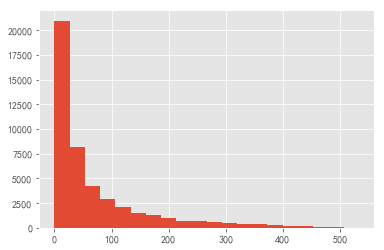

In [111]:
#(order_diff / np.timedelta64(1,'D'))
(order_diff / np.timedelta64(1,'D')).hist(bins = 20) #去掉单位

In [117]:
(user_life['max']-user_life['min']).describe()  #生命周期

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

```
    * 用户的生命周期受只购买一次的用户影响比较厉害（可以排除）
    * 用户消费134天，中位数仅0天

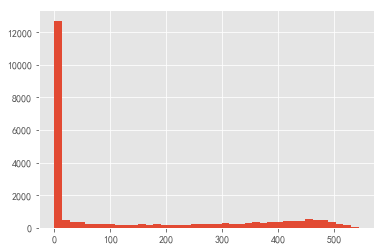

In [115]:
((user_life['max']-user_life['min']) / np.timedelta64(1,'D')).hist(bins = 40)

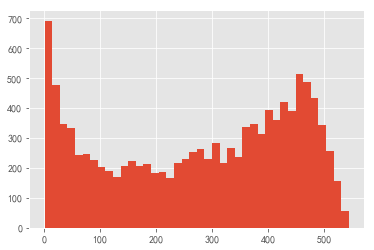

In [120]:
u_l=((user_life['max']-user_life['min']).reset_index()[0] / np.timedelta64(1,'D')) #过滤0
u_l[u_l > 0].hist(bins = 40)

## 复购率和回购率分析

* 复购率
   * 自然月内，购买多次的用户占比
* 回购率
   * 曾经购买过的用户在某一时期内的再次购买的占比

In [121]:
pivoted_counts.head(10)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
# 复购率
purchase_r = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0) #多重嵌套
purchase_r.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


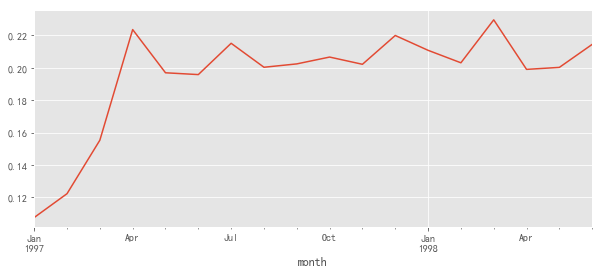

In [124]:
(purchase_r.sum() / purchase_r.count()).plot(figsize= (10,4))  #宽为10，高位4

复购率稳定在20%左右，前三个月因为有大量的新用户涌入，而这批用户只购买了一次，所以复购率降低。

In [126]:
# 回购率
df_purchase.head(2)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)#最后月人工赋予空值
    return status

In [129]:
purchase_b = df_purchase.apply(purchase_back,axis=1)
purchase_b.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [79]:
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


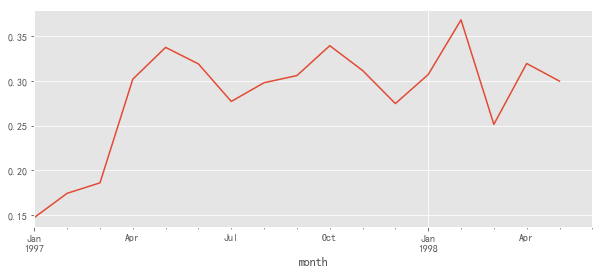

In [80]:
(purchase_b.sum() / purchase_b.count()).plot(figsize= (10,4))